In [8]:
import numpy as np
import math
from scipy.integrate import odeint
import seaborn as sns
import scipy as sp
import matplotlib.pyplot as plt
from matplotlib import gridspec

# Hodgkin-Huxley model

In [9]:
# константы
gK = 36
gNa = 120 
gL = 0.3 

EK = -77.0
ENa = 50.0
EL = -54.387

Cm = 1.0

In [10]:
# функции

time_lst = lambda stop, tick: np.arange(0.0, stop, tick)

an = lambda v: 0.01 * (v + 55) / (1 - np.exp(-0.1 * (v + 55)))
bn = lambda v: 0.125 * np.exp(-0.0125 * (v + 65))

am = lambda v: 0.1 * (v + 40) / (1 - np.exp(-0.1 * (v + 40)))
bm = lambda v: 4 * np.exp(-0.0556 * (v + 65))

ah = lambda v: 0.07 * np.exp(-0.05 * (v + 65))
bh = lambda v: 1 / (1 + np.exp(-0.1 * (v + 35)))

In [11]:
def drvs(y, t, arguments):
    v, n, m, h = y
    gK, gNa, gL, EK, ENa, EL, Cm, I_T = arguments
    
    dv = (I_T(t) - gK * (n ** 4) * (v-EK) - 
                   gNa * (m ** 3) * h * (v-ENa) - 
                   gL * (v-EL)) / Cm
    
    dndt = an(v) * (1-n) - bn(v) * n
    dmdt = am(v) * (1-m) - bm(v) * m
    dhdt = ah(v) * (1-h) - bh(v) * h
    
    return np.array([dv, dndt, dmdt, dhdt])

In [12]:
def pict():
    fig = plt.figure(constrained_layout=True, figsize=(20, 30))
    spec = gridspec.GridSpec(ncols=4, nrows=6, figure=fig)

    ax11 = fig.add_subplot(spec[0:1, 0:1])
    ax12 = fig.add_subplot(spec[0:1, 1:2])
    ax13 = fig.add_subplot(spec[0:1, 2:3])
    ax14 = fig.add_subplot(spec[0:1, 3:4])

    ax2 = fig.add_subplot(spec[1:2, :])

    ax31 = fig.add_subplot(spec[2:3, 0:1])
    ax32 = fig.add_subplot(spec[2:3, 1:2])
    ax33 = fig.add_subplot(spec[2:3, 2:3])
    ax34 = fig.add_subplot(spec[2:3, 3:4])



    ax41 = fig.add_subplot(spec[3:4, 0:1], projection = '3d')
    ax42 = fig.add_subplot(spec[3:4, 1:2], projection = '3d')
    ax43 = fig.add_subplot(spec[3:4, 2:3], projection = '3d')
    ax44 = fig.add_subplot(spec[3:4, 3:4], projection = '3d')


    ax11.plot(t, V[:, 0])
    ax11.set_title('Vm(t)')
    ax12.plot(t, V[:, 1])
    ax12.set_title('n(t)')
    ax13.plot(t, V[:, 2])
    ax13.set_title('m(t)')
    ax14.plot(t, V[:, 3])
    ax14.set_title('h(t)')

    ax2.plot(t, [IFUNC(cur_t) for cur_t in t])
    ax2.set_title('I_inj(t)')

    ax31.plot(V[:, 0], V[:, 1])
    ax31.set_title('Vm(n)')
    ax32.plot(V[:, 0], V[:, 2])
    ax32.set_title('Vm(m)')
    ax33.plot(V[:, 0], V[:, 3])
    ax33.set_title('Vm(h)')

    ax34.plot(V[:, 0], V[:, 1])
    ax34.plot(V[:, 0], V[:, 2])
    ax34.plot(V[:, 0], V[:, 3])
    ax34.set_title('Vm(n, m, h)')




    ax41.plot(t, V[:,0], V[:, 1])
    ax41.set_title('Vm(n, t)')
    ax42.plot(t, V[:,0], V[:, 2])
    ax42.set_title('Vm(m, t)')
    ax43.plot(t, V[:,0], V[:, 3])
    ax43.set_title('Vm(h, t)')

    ax44.plot(t, V[:,0], V[:, 1], linewidth = 0.5)
    ax44.plot(t, V[:,0], V[:, 2], linewidth = 0.5)
    ax44.plot(t, V[:,0], V[:, 3], linewidth = 0.5)
    ax44.set_title('Vm(n, m, h, t)')


    for mg in [ax11, ax12, ax13, ax14, ax2]:
        mg.grid()

    plt.show()


# Эксперимент 1

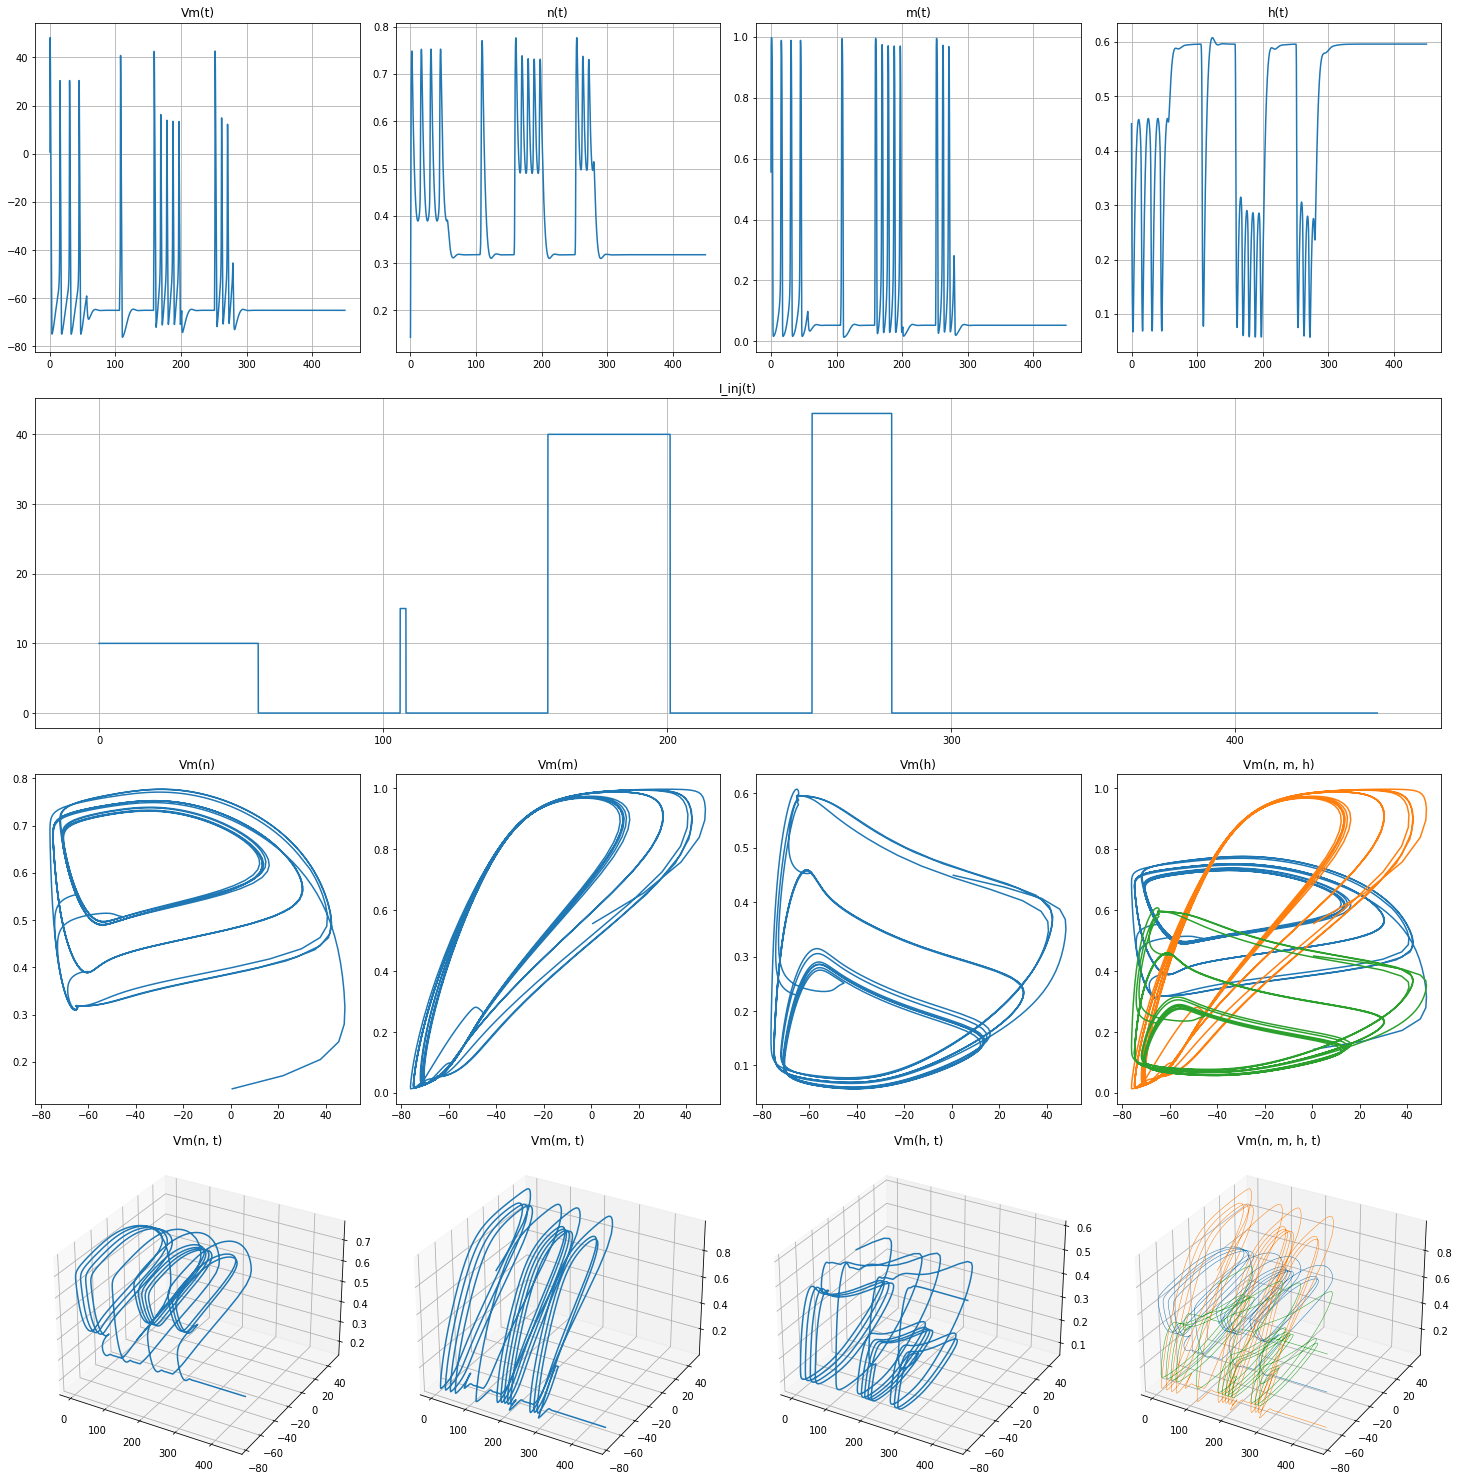

In [17]:
I = sorted(np.random.randint(5, 50, 4))
T = np.random.randint(2, 100, 4)


delay = 50
I_T = {}

time = 0
for i, t in zip(I, T):
    I_T[i] = (time, time + t)
    time = time + t + delay

def IFUNC(t):
    for i, ts in I_T.items():
        if ts[0] <= t <= ts[1]:
            return i
    return 0

t = time_lst(450, 0.05)

invals = np.random.rand(4)
arguments = [gK, gNa, gL, EK, ENa, EL, Cm, IFUNC]
V = odeint(drvs, invals, t, args=(arguments,))

pict()

С увеличением силы тока частота спайков увеличивается, однако, вместе с этим амплитуда уменьшается  

По графикам явно наблюдаются предельные циклы каждого фазового пространства

# Эксперимент 2

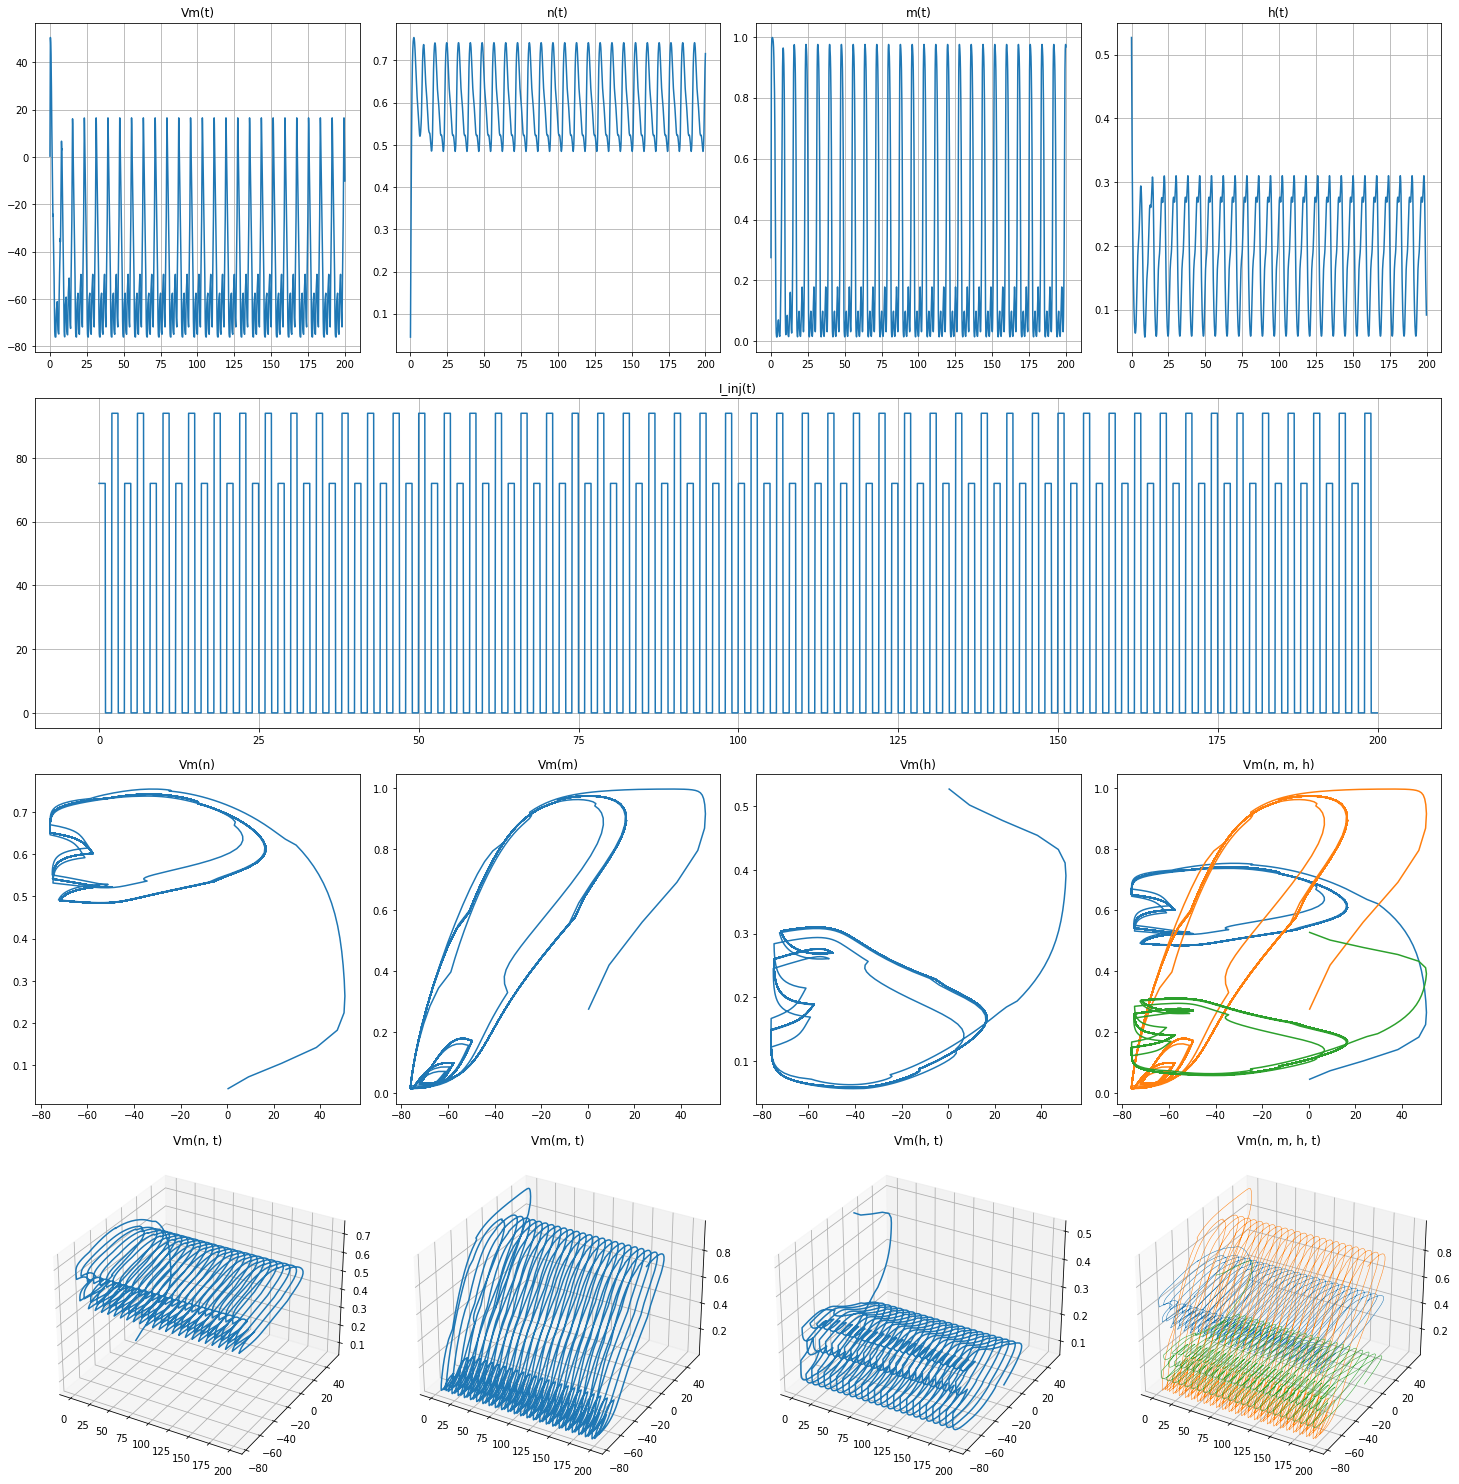

In [19]:
I = sorted(np.random.randint(50, 200, 2))
T = np.random.randint(2, 100, 4)

def IFUNC(t):
    ost = int(t) % 4
    return I[0] if not ost else I[1] if ost == 2 else 0 

t = time_lst(200, 0.05)

invals = np.random.rand(4)
arguments = [gK, gNa, gL, EK, ENa, EL, Cm, IFUNC]
V = odeint(drvs, invals, t, args=(arguments,))

pict()

За счет коротких, но постоянных подач тока, амплитуда и частота принимают переодическую форму в соответсвии с переодической подачей тока